## Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

## Setting matplotlib settings

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=13)
plt.rc('legend', fontsize=13)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

## Reading dataset

In [3]:
df = pd.read_csv('dataset.csv')

## Display the upper part of the dataset

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Dataset size

In [5]:
df.shape

(14999, 10)

## Dataset describe

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Creating a function to draw a comparative bar chart

In [7]:
def draw_comp_bar_plot(title,labels, g1, g2, lg1, lg2, ylabel):
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(16,5))

    rect1 = ax.bar(x-width/2, not_left, width, label=lg1)
    rect2 = ax.bar(x+width/2, emp_left, width, label=lg2)

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.xticks(x, labels)
    ax.legend()

    ax.bar_label(rect1, padding=1)
    ax.bar_label(rect2, padding=1)

    fig.tight_layout()
    plt.show()

## Examining the relationship between current satisfaction and leaving the company

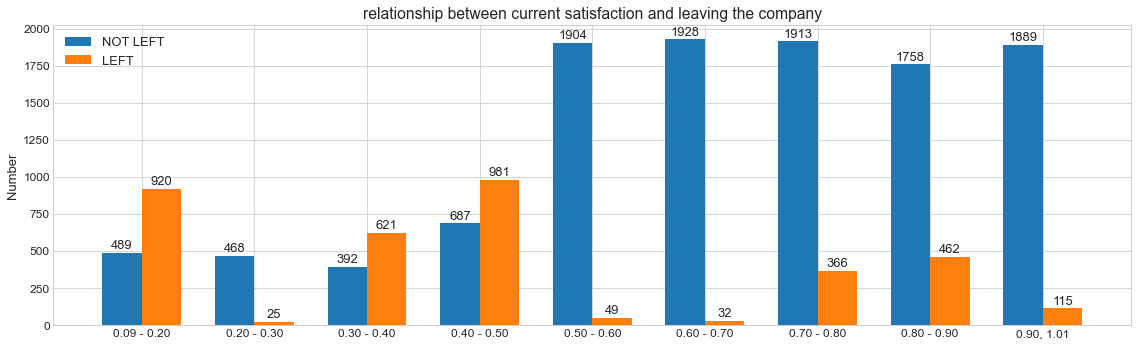

In [8]:
satisfactions = [(0.09, 0.20), (0.20, 0.30), (0.30, 0.40),
                 (0.40, 0.50), (0.50, 0.60), (0.60, 0.70),
                 (0.70, 0.80), (0.80, 0.90), (0.90, 1.01)]

emp_left, not_left = [], []
for value in satisfactions:
    not_left.append(df[(df['satisfaction_level'] >= value[0]) & (df['satisfaction_level'] < value[1])].left.value_counts()[0])
    emp_left.append(df[(df['satisfaction_level'] >= value[0]) & (df['satisfaction_level'] < value[1])].left.value_counts()[1])
    

draw_comp_bar_plot(title='relationship between current satisfaction and leaving the company',
                   labels=['0.09 - 0.20', '0.20 - 0.30', '0.30 - 0.40', 
                           '0.40 - 0.50', '0.50 - 0.60', '0.60 - 0.70', 
                           '0.70 - 0.80', '0.80 - 0.90', '0.90, 1.01'],
                   g1=not_left, g2=emp_left,
                   lg1='NOT LEFT', lg2='LEFT',
                   ylabel='Number')

## The relationship between the number of projects completed by employees and leaving the company

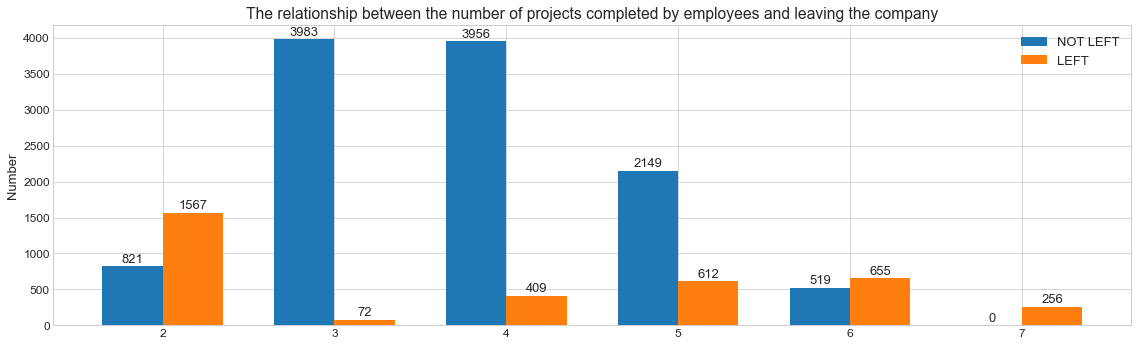

In [9]:
emp_left, not_left = [], []
for value in range(2, 8):
    try:
        not_left.append(df[df['number_project'] == value].left.value_counts()[0])
    except KeyError:
        not_left.append(0)
        
    emp_left.append(df[df['number_project'] == value].left.value_counts()[1])


draw_comp_bar_plot(title='The relationship between the number of projects completed by employees and leaving the company',
                   labels=range(2, 8),
                   g1=not_left, g2=emp_left,
                   lg1='NOT LEFT', lg2='LEFT',
                   ylabel='Number')

## Average working hours per month according to the number of years working in the company

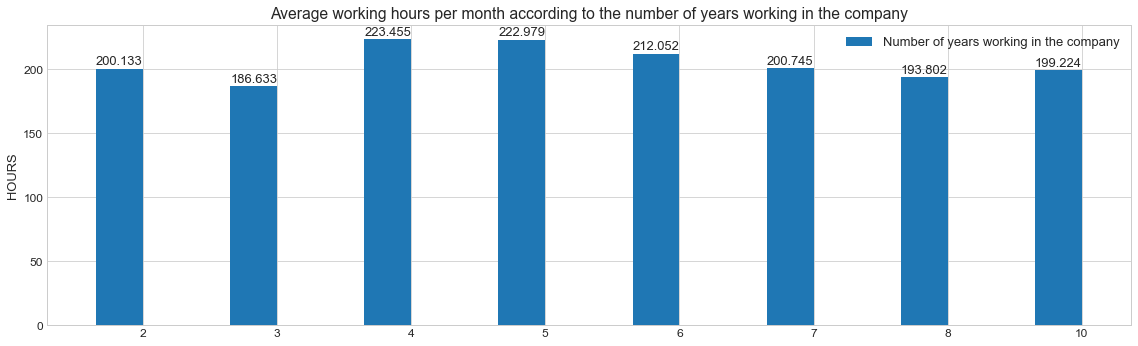

In [10]:
labels = [2, 3, 4, 5, 6, 7, 8, 10]

g = [df[df.time_spend_company == value].average_montly_hours.mean() for value in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(16,5))

rect1 = ax.bar(x-width/2, g, width, label='Number of years working in the company')

ax.set_ylabel('HOURS')
ax.set_title('Average working hours per month according to the number of years working in the company')
plt.xticks(x, labels)
ax.legend()

ax.bar_label(rect1, padding=1)

fig.tight_layout()
plt.show()

## Showing the number of people who left the company according to the length of time they worked in the company.

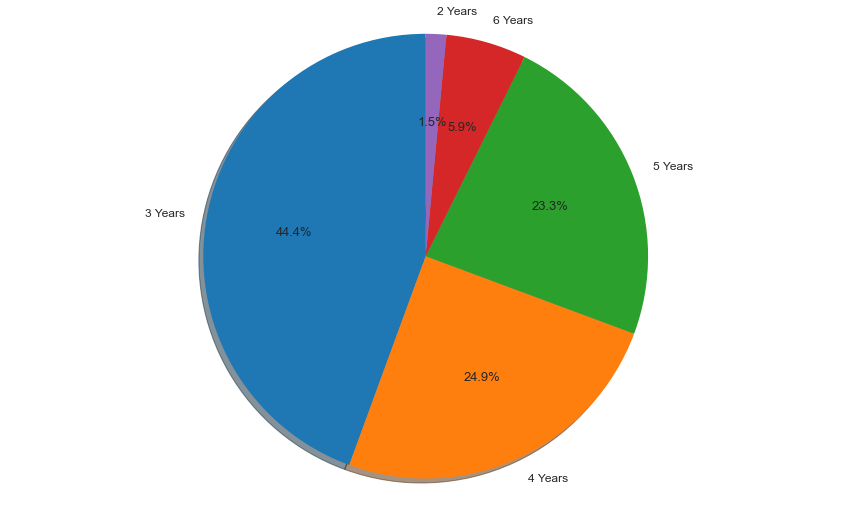

3    1586
4     890
5     833
6     209
2      53
Name: time_spend_company, dtype: int64

In [11]:
time_spent = df[df['left'] == 1].time_spend_company.value_counts()

labels = ['3 Years', '4 Years', '5 Years', '6 Years', '2 Years']

fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(time_spent, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')

plt.show()

time_spent

## The proportion of those who left the company due to work disputes

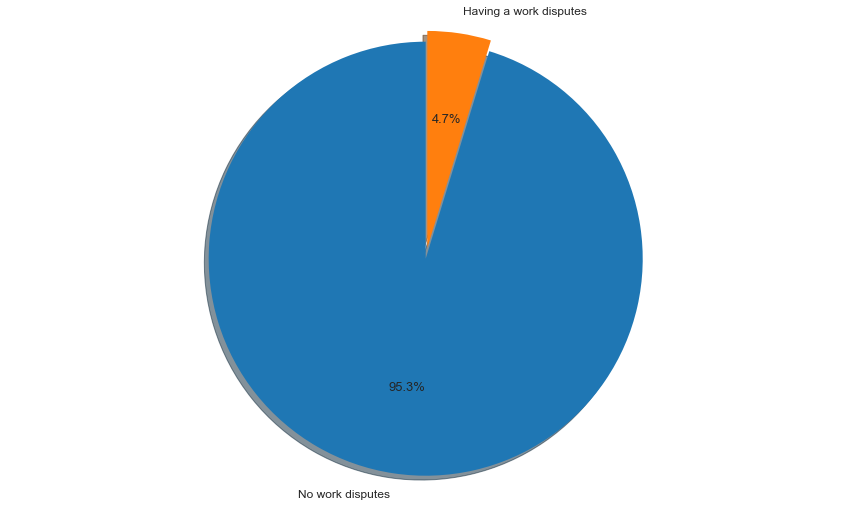

0    3402
1     169
Name: Work_accident, dtype: int64

In [12]:
work_disputes = df[df['left'] == 1].Work_accident.value_counts()

labels = ['No work disputes', 'Having a work disputes']

explode = [0, 0.05]

fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(work_disputes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)

ax1.axis('equal')

plt.show()

work_disputes

## The relationship between the promotion of employees and their departure from the company

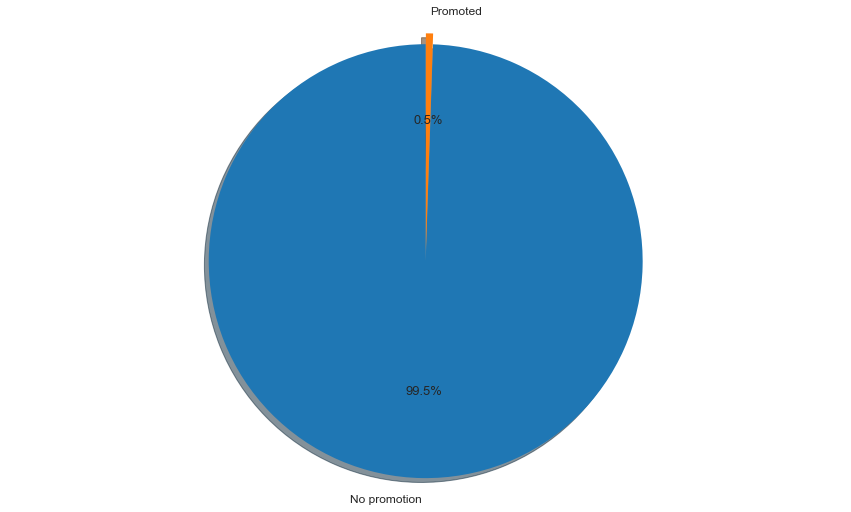

0    3552
1      19
Name: promotion_last_5years, dtype: int64

In [13]:
emp_promotion = df[df['left'] == 1].promotion_last_5years.value_counts()

labels = ['No promotion', 'Promoted']

explode = [0, 0.05]

fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(emp_promotion, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)

ax1.axis('equal')

plt.show()

emp_promotion

## The relationship of people's exit from the company to their job position

In [14]:
percentage = {}

positions = ['sales', 'technical', 'support', 'IT', 'hr', 
             'accounting', 'marketing', 'product_mng', 'RandD', 'management']

for pos in positions:
    emp_left_job_position = df[df['left'] == 1].sales.value_counts()[pos]
    not_left_job_position = df[df['left'] == 0].sales.value_counts()[pos]
    
    percentage[pos] = [emp_left_job_position, emp_left_job_position + not_left_job_position]

    
print(percentage)

{'sales': [1014, 4140], 'technical': [697, 2720], 'support': [555, 2229], 'IT': [273, 1227], 'hr': [215, 739], 'accounting': [204, 767], 'marketing': [203, 858], 'product_mng': [198, 902], 'RandD': [121, 787], 'management': [91, 630]}


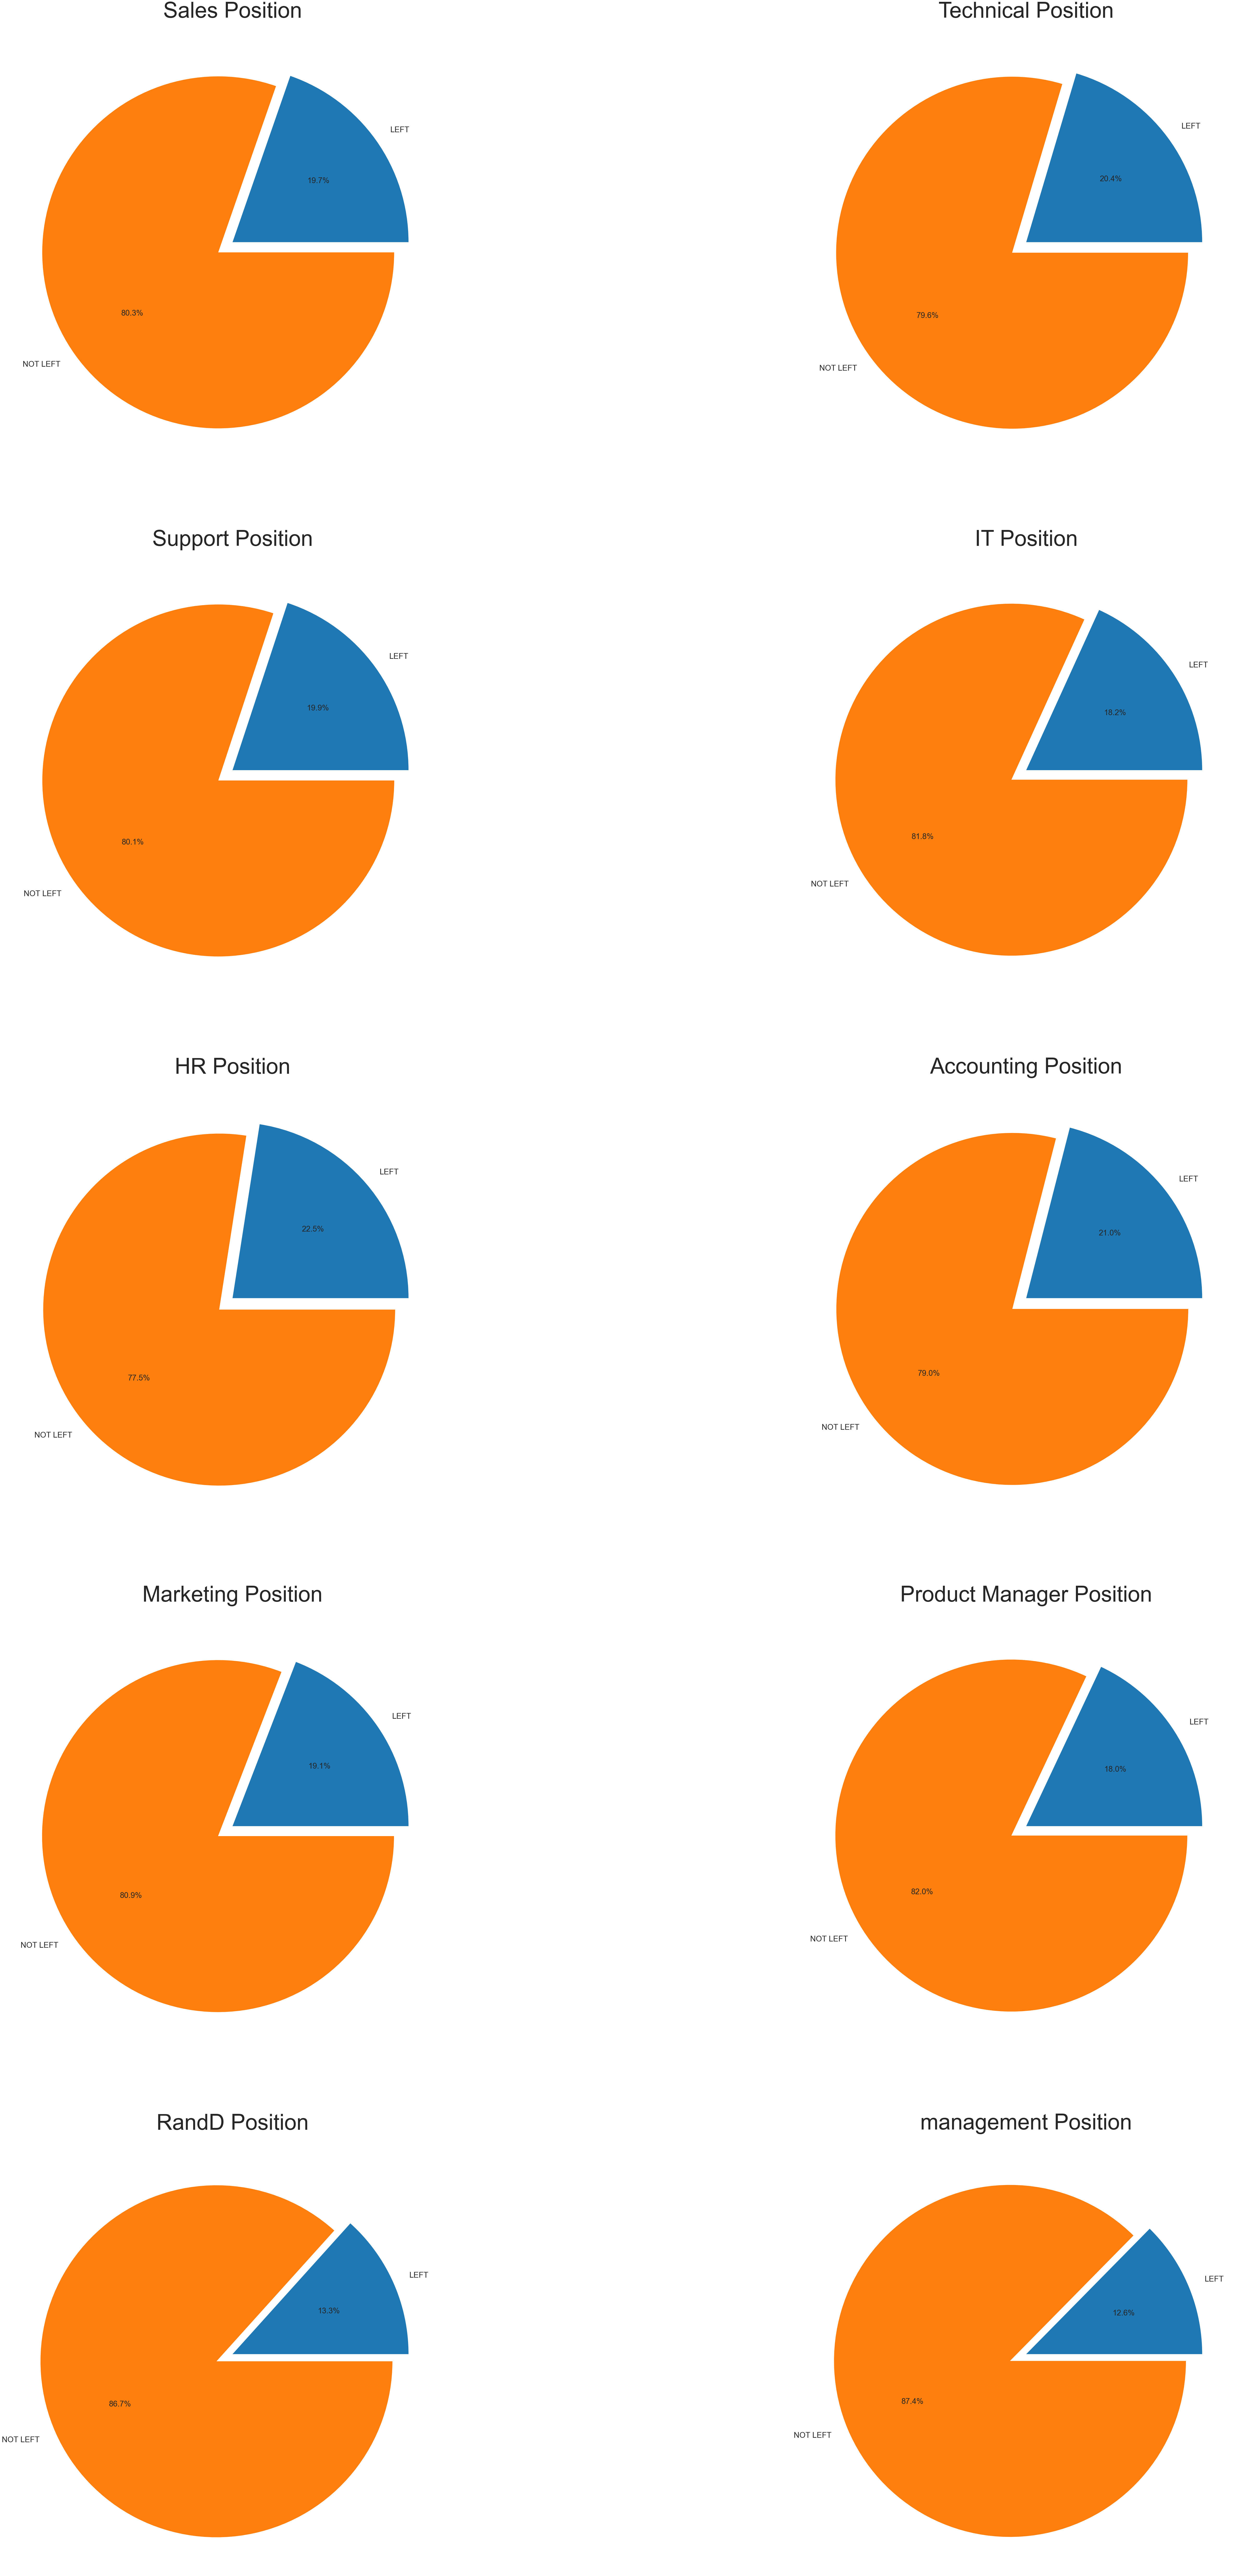

In [15]:
plt.rc('font', size=70)

fig, ([ax1,ax2],[ax3, ax4], [ax5, ax6], [ax7, ax8], [ax9, ax10]) = plt.subplots(5, 2)

fig.set_size_inches(100, 180)

ax1.pie(percentage['sales'], labels=['LEFT', 'NOT LEFT'], autopct='%1.1f%%', textprops={'fontsize': 30},
         explode=[0, 0.1])
ax1.set_title('Sales Position')

ax2.pie(percentage['technical'], labels=['LEFT', 'NOT LEFT'], autopct='%1.1f%%', textprops={'fontsize': 30},
         explode=[0, 0.1])
ax2.set_title('Technical Position')

ax3.pie(percentage['support'], labels=['LEFT', 'NOT LEFT'], autopct='%1.1f%%', textprops={'fontsize': 30},
         explode=[0, 0.1])
ax3.set_title('Support Position')

ax4.pie(percentage['IT'], labels=['LEFT', 'NOT LEFT'], autopct='%1.1f%%', textprops={'fontsize': 30},
         explode=[0, 0.1])
ax4.set_title('IT Position')

ax5.pie(percentage['hr'], labels=['LEFT', 'NOT LEFT'], autopct='%1.1f%%', textprops={'fontsize': 30},
         explode=[0, 0.1])
ax5.set_title('HR Position')

ax6.pie(percentage['accounting'], labels=['LEFT', 'NOT LEFT'], autopct='%1.1f%%', textprops={'fontsize': 30},
         explode=[0, 0.1])
ax6.set_title('Accounting Position')

ax7.pie(percentage['marketing'], labels=['LEFT', 'NOT LEFT'], autopct='%1.1f%%', textprops={'fontsize': 30},
         explode=[0, 0.1])
ax7.set_title('Marketing Position')

ax8.pie(percentage['product_mng'], labels=['LEFT', 'NOT LEFT'], autopct='%1.1f%%', textprops={'fontsize': 30},
         explode=[0, 0.1])
ax8.set_title('Product Manager Position')

ax9.pie(percentage['RandD'], labels=['LEFT', 'NOT LEFT'], autopct='%1.1f%%', textprops={'fontsize': 30},
         explode=[0, 0.1])
ax9.set_title('RandD Position')

ax10.pie(percentage['management'], labels=['LEFT', 'NOT LEFT'], autopct='%1.1f%%', textprops={'fontsize': 30},
         explode=[0, 0.1])
ax10.set_title('management Position')

plt.show()
plt.rc('font', size=13)

## The relationship between employees' salaries and their departure from the company

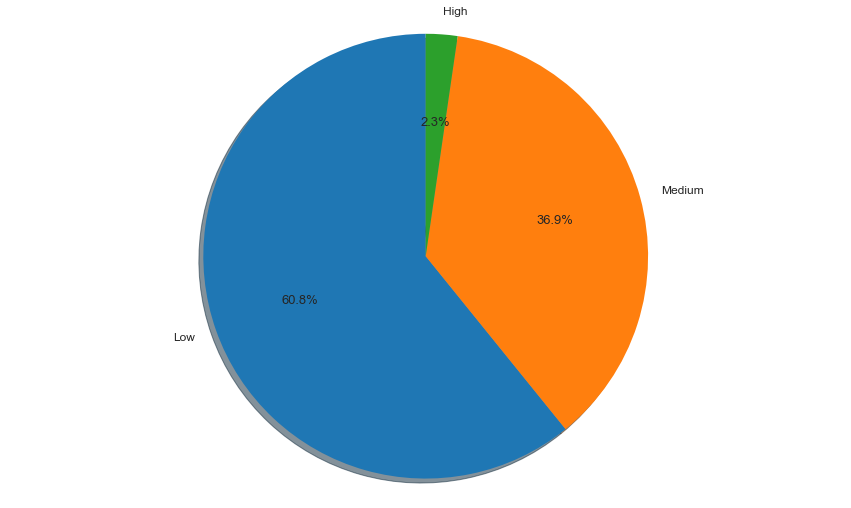

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [16]:
salaries = df[df['left'] == 1].salary.value_counts()

labels = ['Low', 'Medium', 'High']

fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(salaries, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')

plt.show()

salaries

# Modelling

## Importing tools

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

## Creating one hot function

In [18]:
def make_one_hot(data, field):
    temp = pd.get_dummies(data[field], prefix=field)
    data.drop(field, axis=1, inplace=True)
    return pd.concat([data, temp], axis=1)

## One hot job position field

In [19]:
df = make_one_hot(df, 'sales')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,low,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,low,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,low,0,0,0,0,0,0,0,0,1,0


## Grading of income field

In [20]:
df['salary'].replace({'low': 0, 'medium': 1, 'high': 2}, inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0


## Cutting the Label and Dropping it From Data:

In [21]:
labels = df['left']
df.drop('left', axis=1, inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,0,1,0


## Separate the data by train test split method

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, shuffle=True)

## Modeling with KNN algorithm

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute')
knn_model.fit(x_train, y_train)
print(f"Prediction: {knn_model.score(x_test, y_test) * 100}%")

Prediction: 95.89999999999999%


## Evaluation KNN model:

In [24]:
scores = cross_val_score(knn_model, x_train, y_train, cv=5, scoring='accuracy')
print("Accuracy: {} (+/- {})".format(round(scores.mean(), 2), round(scores.std() * 2, 2)))

Accuracy: 0.95 (+/- 0.01)


In [25]:
target_names = ['NOT LEFT', 'LEFT']
print(classification_report(y_test, knn_model.predict(x_test), target_names=target_names))

              precision    recall  f1-score   support

    NOT LEFT       0.99      0.95      0.97      2284
        LEFT       0.87      0.97      0.92       716

    accuracy                           0.96      3000
   macro avg       0.93      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



## Modeling with DT algorithm

In [26]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train, y_train)
print(f"Prediction: {dt_model.score(x_test, y_test) * 100}%")

Prediction: 98.23333333333333%


## Evaluation DT model:

In [27]:
scores = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='accuracy')
print("Accuracy: {} (+/- {})".format(round(scores.mean(), 2), round(scores.std() * 2, 2)))

Accuracy: 0.98 (+/- 0.0)


In [28]:
target_names = ['NOT LEFT', 'LEFT']
print(classification_report(y_test, dt_model.predict(x_test), target_names=target_names))

              precision    recall  f1-score   support

    NOT LEFT       0.99      0.99      0.99      2284
        LEFT       0.95      0.97      0.96       716

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



## Modeling with MLP algorithm

In [29]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
mlp_model = MLPClassifier(alpha=0.0001, max_iter=250)
mlp_model.fit(x_train, y_train)
print(f"Prediction: {mlp_model.score(x_test, y_test) * 100}%")

Prediction: 96.86666666666667%


## Evaluation MLP model:

In [31]:
scores = cross_val_score(mlp_model, x_train, y_train, cv=5, scoring='accuracy')
print("Accuracy: {} (+/- {})".format(round(scores.mean(), 2), round(scores.std() * 2, 2)))

Accuracy: 0.96 (+/- 0.0)


In [32]:
target_names = ['NOT LEFT', 'LEFT']
print(classification_report(y_test, mlp_model.predict(x_test), target_names=target_names))

              precision    recall  f1-score   support

    NOT LEFT       0.98      0.98      0.98      2284
        LEFT       0.94      0.93      0.93       716

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



## Final modeling

In [33]:
model = dt_model

import pickle
pickle.dump(model, open('HRM_MODEL.sav', 'wb'))

## Testing the model with new data

In [34]:
hrm_model = pickle.load(open('HRM_MODEL.sav', 'rb'))

### Examples

In [35]:
"""
satisfaction_level = 0.30
last_evaluation = 0.50
number_project = 5
average_montly_hours = 250H
time_spend_company = 5Y
Work_accident = NO
promotion_last_5years = NO
job_position = IT
"""
exm1 = hrm_model.predict([[0.30, 0.50, 5, 250, 5, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print('NOT LEFT' if exm1 == 0 else 'LEFT')

NOT LEFT


In [36]:
"""
satisfaction_level = 0.30
last_evaluation = 0.20
number_project = 2
average_montly_hours = 210H
time_spend_company = 3Y
Work_accident = YES
promotion_last_5years = NO
job_position = Management
"""
exm2 = hrm_model.predict([[0.30, 0.20, 2, 210, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
print('NOT LEFT' if exm2 == 0 else 'LEFT')

NOT LEFT


In [37]:
"""
satisfaction_level = 0.10
last_evaluation = 0.10
number_project = 3
average_montly_hours = 170H
time_spend_company = 2Y
Work_accident = NO
promotion_last_5years = NO
job_position = HR
"""
exm3 = hrm_model.predict([[0.10, 0.10, 3, 170, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])
print('NOT LEFT' if exm3 == 0 else 'LEFT')

LEFT
